In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading the Data Set stored in Github
aqi_ts_train = pd.read_csv("https://raw.githubusercontent.com/Jaspreet1711/Air-Pollutant-Prediction-Delhi/main/2.%20Data%20Preparation/Lvl%20-5%20Final%20Data/Time_Series/aqi_ts_train.csv", index_col = 'timestamp')
aqi_ts_test = pd.read_csv("https://raw.githubusercontent.com/Jaspreet1711/Air-Pollutant-Prediction-Delhi/main/2.%20Data%20Preparation/Lvl%20-5%20Final%20Data/Time_Series/aqi_ts_test.csv", index_col = 'timestamp')

In [4]:
# -- Converting the timestamp columns into datetime format
aqi_ts_train.index = pd.to_datetime(aqi_ts_train.index)
aqi_ts_test.index = pd.to_datetime(aqi_ts_test.index)

In [5]:
# -- Joining both the datasets
aqi_ts_comb = pd.concat([aqi_ts_train, aqi_ts_test], axis=0)

In [6]:
# -- Reseting the index
aqi_ts_train.reset_index(inplace = True)
aqi_ts_test.reset_index(inplace = True)
aqi_ts_comb.reset_index(inplace = True)

In [7]:
# -- Removing Duplicates from Datasets
aqi_ts_train = aqi_ts_train.drop_duplicates(subset = 'timestamp', keep='last')
aqi_ts_test = aqi_ts_test.drop_duplicates(subset = 'timestamp', keep='last')
aqi_ts_comb = aqi_ts_comb.drop_duplicates(subset = 'timestamp', keep='last')

In [8]:
!pip install darts

     |████████████████████████████████| 326 kB 3.9 MB/s 
     |████████████████████████████████| 11.2 MB 76.0 MB/s 
     |████████████████████████████████| 9.8 MB 49.4 MB/s 
     |████████████████████████████████| 65 kB 6.1 MB/s 
     |████████████████████████████████| 1.4 MB 49.4 MB/s 
     |████████████████████████████████| 165 kB 81.5 MB/s 
     |████████████████████████████████| 792 kB 71.1 MB/s 
     |████████████████████████████████| 375 kB 82.6 MB/s 
     |████████████████████████████████| 895 kB 65.1 MB/s 
     |████████████████████████████████| 49 kB 8.4 MB/s 
     |████████████████████████████████| 43 kB 3.2 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639069 sha256=d7fcb8849d7035ff17ec3b9b0aca05e66a40c8680259c31168fb01cc85a4b59e
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels

In [9]:
# -- Modifying the Datasets from pandas.DataFrame Structure to Darts.TimeSeries Structure for Modeling
from darts import TimeSeries

series_train_pm25 = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'PM2.5')
series_test_pm25 = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'PM2.5')
series_comb_pm25 = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'PM2.5')

series_train_pm10 = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'PM10')
series_test_pm10 = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'PM10')
series_comb_pm10 = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'PM10')

series_train_ws = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'Wind_Speed_in_Kmph')
series_test_ws = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'Wind_Speed_in_Kmph')
series_comb_ws = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'Wind_Speed_in_Kmph')

series_train_tmp = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'Temperature_in_°C')
series_test_tmp = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'Temperature_in_°C')
series_comb_tmp = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'Temperature_in_°C')

series_train_hum = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'Rel_Humidity')
series_test_hum = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'Rel_Humidity')
series_comb_hum = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'Rel_Humidity')

series_train_ap = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'Atmospheric_Pressure_in_mb')
series_test_ap = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'Atmospheric_Pressure_in_mb')
series_comb_ap = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'Atmospheric_Pressure_in_mb')

series_train_ap = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'Atmospheric_Pressure_in_mb')
series_test_ap = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'Atmospheric_Pressure_in_mb')
series_comb_ap = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'Atmospheric_Pressure_in_mb')

series_train_co = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'CO')
series_test_co = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'CO')
series_comb_co = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'CO')

series_train_no2 = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'NO2')
series_test_no2 = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'NO2')
series_comb_no2 = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'NO2')

series_train_so2 = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'SO2')
series_test_so2 = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'SO2')
series_comb_so2 = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'SO2')

series_train_dp = TimeSeries.from_dataframe(aqi_ts_train, 'timestamp', 'Dew_Point_in_°C')
series_test_dp = TimeSeries.from_dataframe(aqi_ts_test, 'timestamp', 'Dew_Point_in_°C')
series_comb_dp = TimeSeries.from_dataframe(aqi_ts_comb, 'timestamp', 'Dew_Point_in_°C')

In [10]:
# -- Using Darts Module for TimeSeries Forecasting
from darts.models import TransformerModel

model_transformer_daily = TransformerModel(input_chunk_length = 90, output_chunk_length = 30, n_epochs = 100, random_state = 10)

# -- Inputs for Training the Model in Series structure.
Input_Ls = [series_train_pm25, series_train_pm10, series_train_ws, series_train_tmp, series_train_hum, series_train_ap, series_train_co, series_train_no2, series_train_dp]

In [11]:
# Training the Model -- It will take decent amount of time (I am using Google Colab Pro for efficiency)
model_transformer_daily.fit(Input_Ls, verbose = True)

# converting the model into pickle
import pickle
file = open('TransformerModel_AQI_TS_Daily.pkl', 'wb')
pickle.dump(model_transformer_daily, file)

[2022-01-27 15:31:55,221] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 16011 samples.
[2022-01-27 15:31:55,221] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 16011 samples.
[2022-01-27 15:31:55,364] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-01-27 15:31:55,364] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 1/100 [00:11<18:30, 11.22s/it]

 11%|█         | 11/100 [01:59<16:02, 10.82s/it]

 21%|██        | 21/100 [03:48<14:15, 10.82s/it]

 31%|███       | 31/100 [05:36<12:31, 10.88s/it]

 41%|████      | 41/100 [07:24<10:35, 10.76s/it]

 51%|█████     | 51/100 [09:13<08:51, 10.86s/it]

 61%|██████    | 61/100 [11:02<07:05, 10.91s/it]

 71%|███████   | 71/100 [12:50<05:14, 10.83s/it]

 81%|████████  | 81/100 [14:38<03:25, 10.80s/it]

 91%|█████████ | 91/100 [16:26<01:37, 10.83s/it]

100%|██████████| 100/100 [18:04<00:00, 10.84s/it]


In [12]:
# Predicting for 42 Days preceding Training Set using our trained model. We will compare it with Test Set to perform Backtesting of our Model.
prediction_pm25 = model_transformer_daily.predict(n = 42, series = series_train_pm25)

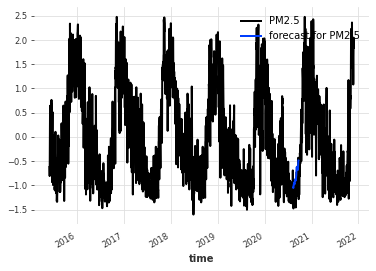

In [16]:
# Visualising Back Testing 
series_comb_pm25.plot()
prediction_pm25.plot(label = 'forecast for PM2.5', low_quantile = 0.05, high_quantile = 0.95)
plt.legend()
plt.show()